# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?&appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | yanbu
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | port mathurin
Processing Record 5 of Set 1 | west island
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | ruidoso
Processing Record 8 of Set 1 | badger
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | tiksi
Processing Record 12 of Set 1 | kalemie
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | tadine
Processing Record 15 of Set 1 | severnoye
Processing Record 16 of Set 1 | uturoa
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | flying fish cove
Processing Record 19 of Set 1 | geraldton
Processing Record 20 of Set 1 | dzhalagash
Processing Record 21 of Set 1 | al jubayl
Processing Record 22 of Set 1 | ushuaia
Processing Record 23

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,25.85,82,100,3.60,US,1699500331
1,yanbu,24.0891,38.0637,28.02,61,0,5.14,SA,1699500331
2,port elizabeth,-33.9180,25.5701,14.06,81,0,2.57,ZA,1699500332
3,port mathurin,-19.6833,63.4167,25.01,71,4,8.06,MU,1699500333
4,west island,-12.1568,96.8225,28.99,79,75,5.66,CC,1699500109


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,25.85,82,100,3.60,US,1699500331
1,yanbu,24.0891,38.0637,28.02,61,0,5.14,SA,1699500331
2,port elizabeth,-33.9180,25.5701,14.06,81,0,2.57,ZA,1699500332
3,port mathurin,-19.6833,63.4167,25.01,71,4,8.06,MU,1699500333
4,west island,-12.1568,96.8225,28.99,79,75,5.66,CC,1699500109


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

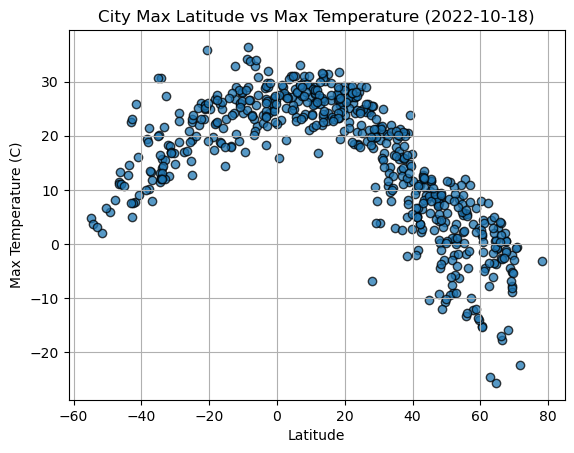

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], alpha=0.75, edgecolors='black')
# Incorporate the other graph properties
plt.title('City Max Latitude vs Max Temperature (2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

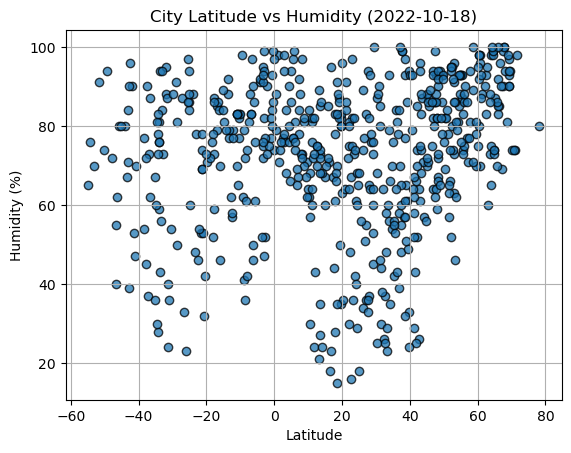

In [11]:
# Build scatter plot for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

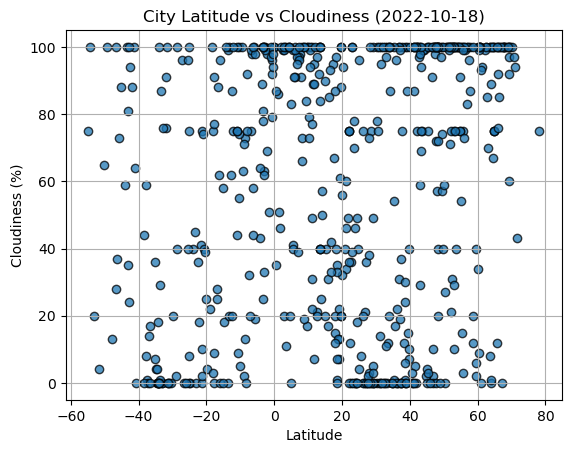

In [13]:
# Build scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

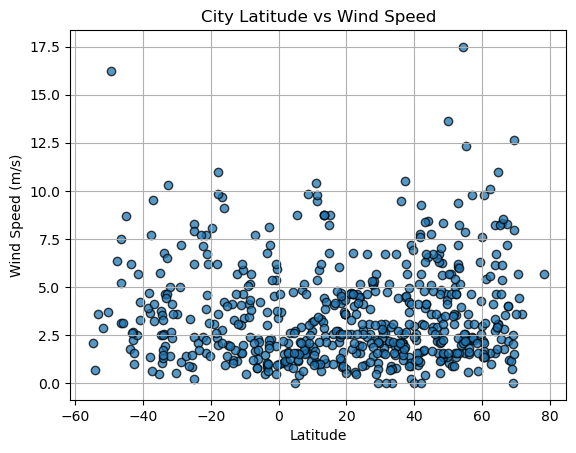

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], alpha=0.75, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
def regressfunction (hemi_param, weather_param):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(hemi_param, weather_param)
    line_plot = hemi_param * slope + intercept
    line_annotate = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_value = f"The r-value is: {round(rvalue,2)}"
    return line_plot, line_annotate, r_value

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hilo,19.7297,-155.0900,25.85,82,100,3.60,US,1699500331
1,yanbu,24.0891,38.0637,28.02,61,0,5.14,SA,1699500331
6,ruidoso,33.3317,-105.6730,14.17,23,0,0.00,US,1699500335
7,badger,64.8000,-147.5333,-0.86,74,75,3.09,US,1699500336
8,ilulissat,69.2167,-51.1000,-1.99,93,100,0.00,GL,1699500337


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,port elizabeth,-33.9180,25.5701,14.06,81,0,2.57,ZA,1699500332
3,port mathurin,-19.6833,63.4167,25.01,71,4,8.06,MU,1699500333
4,west island,-12.1568,96.8225,28.99,79,75,5.66,CC,1699500109
5,margaret river,-33.9500,115.0667,15.68,59,100,6.77,AU,1699500140
9,port-aux-francais,-49.3500,70.2167,5.85,94,100,16.23,TF,1699500338


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.88


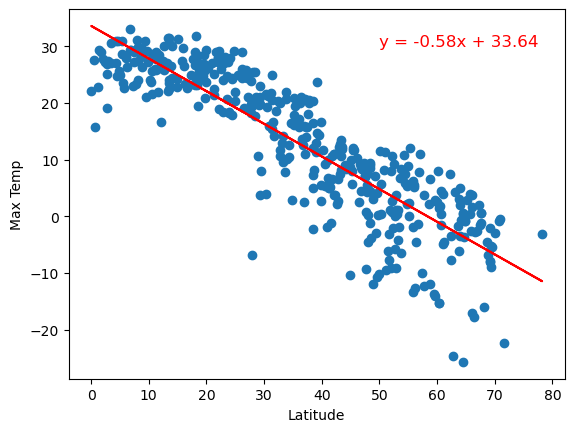

In [28]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'], regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[0], color='r')
plt.annotate(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[1],(50,30),fontsize=12,color='r')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(regressfunction(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])[2])
plt.show()

The r-value is: 0.76


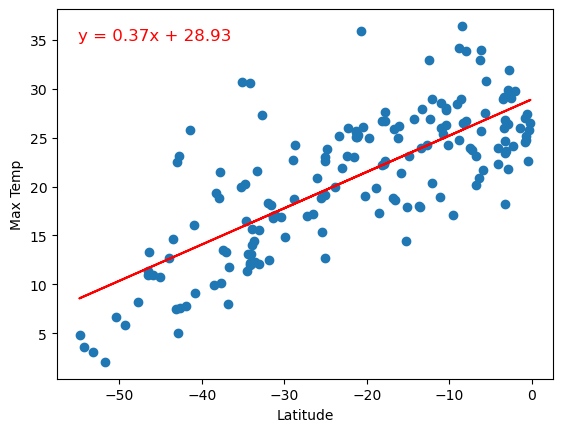

In [29]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'], regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[0], color='r')
plt.annotate(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[1],(-55, 35),fontsize=12,color='r')
plt.ylabel('Max Temp')
plt.xlabel('Latitude')
print(regressfunction(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])[2])
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


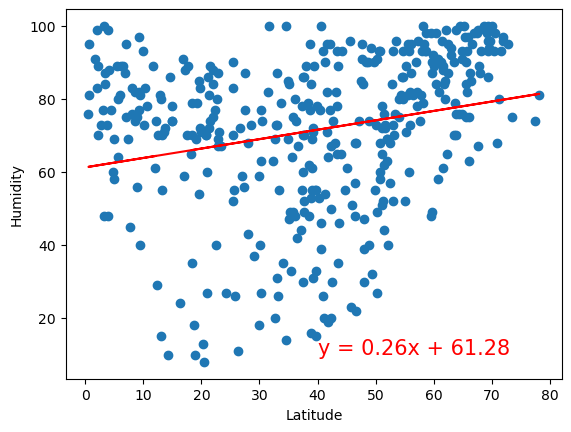

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


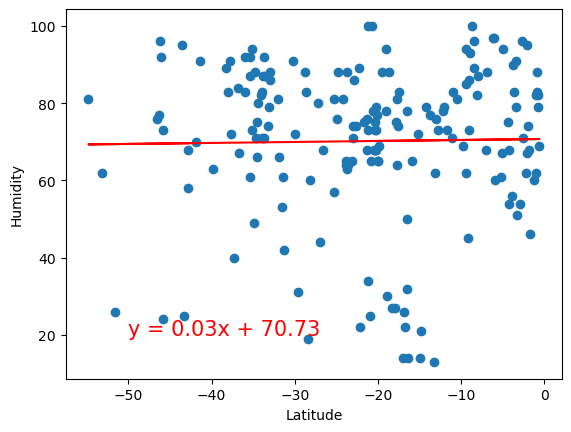

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


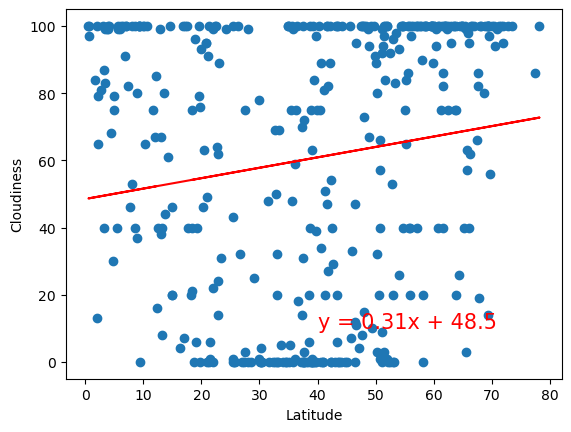

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


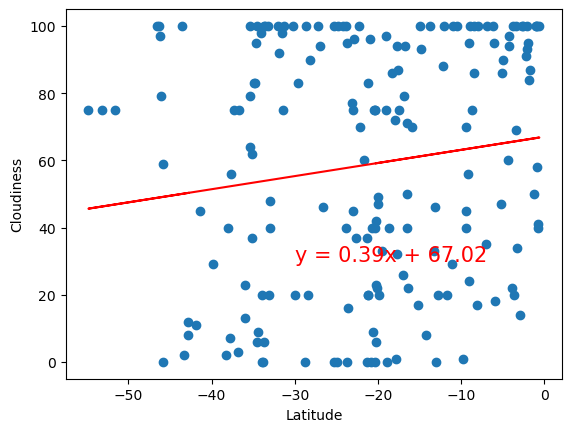

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


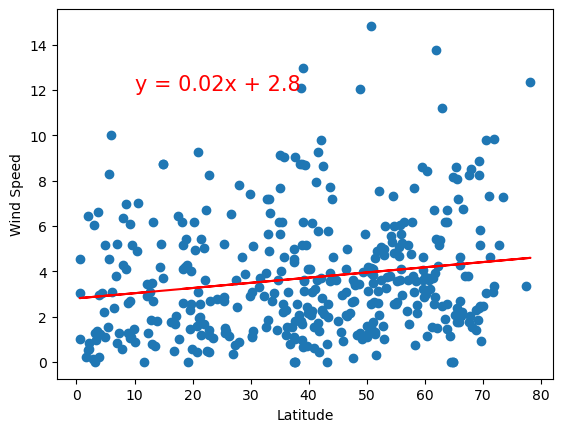

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


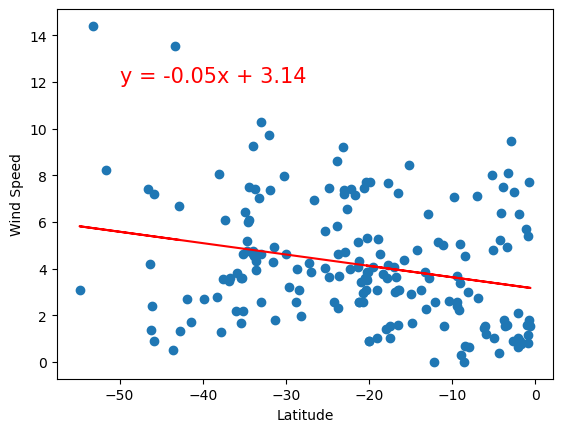

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE